<a href="https://colab.research.google.com/github/AyonChatterjee/ML-Projects-/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prettytable

#importing dependencies

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from prettytable import Prettytable

ImportError: cannot import name 'Prettytable' from 'prettytable' (/usr/local/lib/python3.10/dist-packages/prettytable/__init__.py)

In [2]:
!pip install prettytable

#importing dependencies

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

print(PrettyTable)

<class 'prettytable.prettytable.PrettyTable'>


In [4]:
train_df = pd.read_excel("Data_Train.xlsx")

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
train_df.describe()

,Duration,Price
count,10683.000000,10683.000000
mean,643.093232,9087.064121
std,507.862001,4611.359167
min,5.000000,1759.000000
25%,170.000000,5277.000000
50%,520.000000,8372.000000
75%,930.000000,12373.000000
max,2860.000000,79512.000000


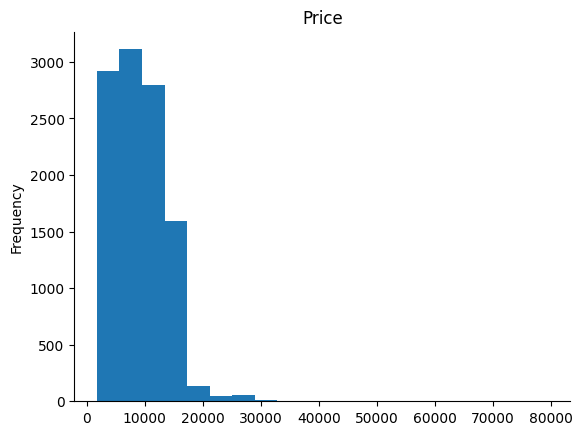

In [11]:
from matplotlib import pyplot as plt
train_df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

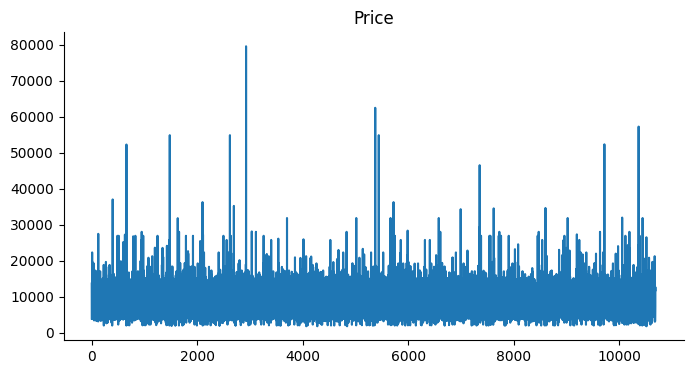

In [12]:
from matplotlib import pyplot as plt
train_df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
train_df[train_df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,1420,NaN,No info,7480


In [14]:
train_df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [15]:
train_df.dropna(inplace = True)
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,830,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,1275,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,1560,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,1375,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,175,non-stop,No info,7303


Removing the repeated values.

In [16]:
train_df.drop_duplicates(keep = 'first' , inplace = True)
train_df.head()
train_df.shape

(10462, 11)

In [17]:
train_df["Airline"].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [19]:
#Testing the data

test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [20]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [21]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [22]:
test_df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


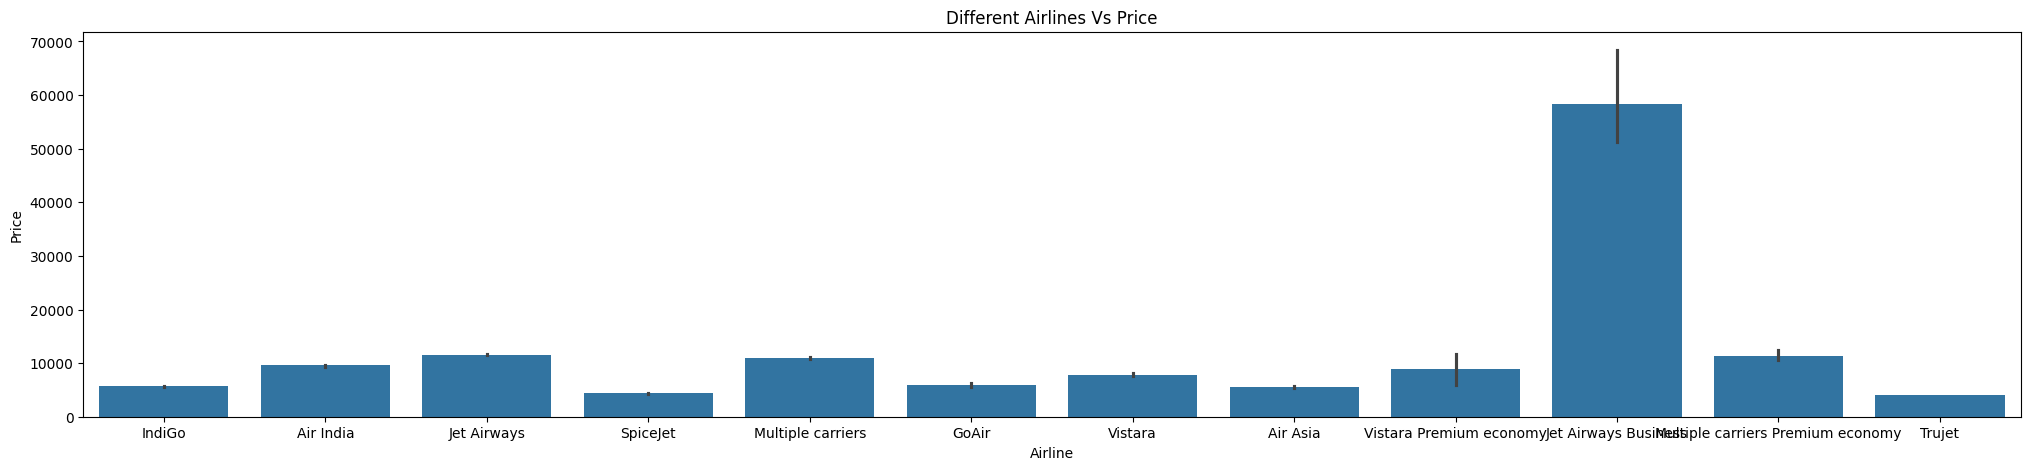

In [29]:
plt.figure(figsize=(25 , 5))
sns.barplot(x = "Airline" , y = "Price" , data = train_df)
plt.title("Different Airlines Vs Price")

plt.show()


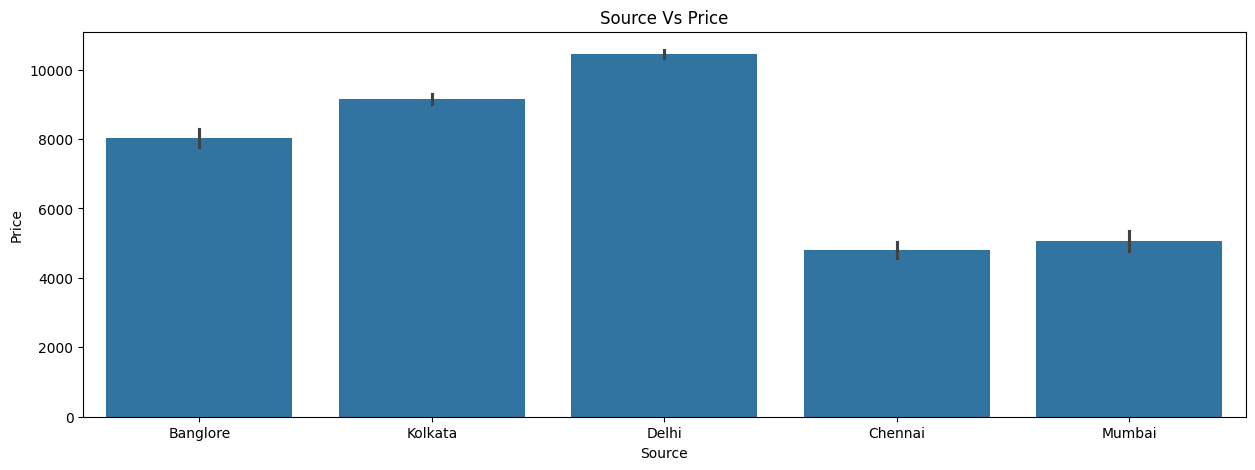

In [31]:
plt.figure(figsize=(15 , 5))
sns.barplot(x = "Source" , y = "Price" , data = train_df)
plt.title("Source Vs Price")
plt.show()


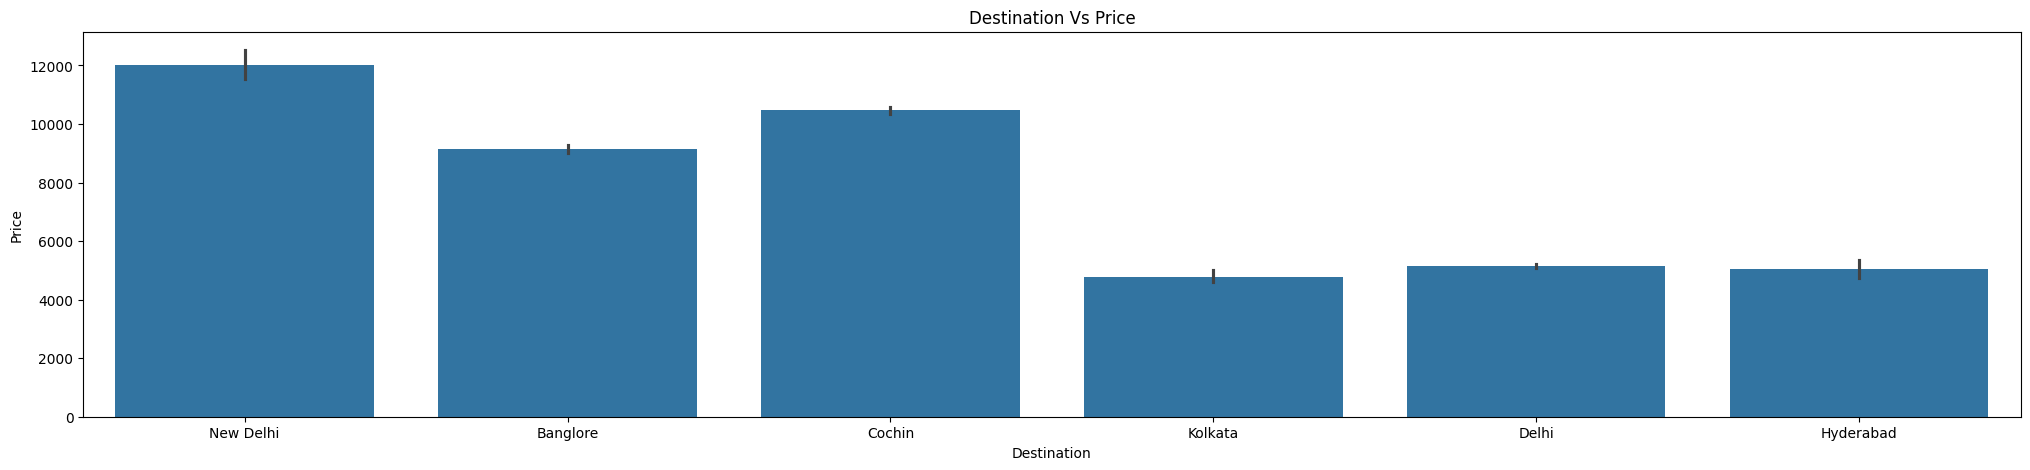

In [30]:
plt.figure(figsize=(25 , 5))
sns.barplot(x = "Destination" , y = "Price" , data = train_df)
plt.title("Destination Vs Price")
plt.show()


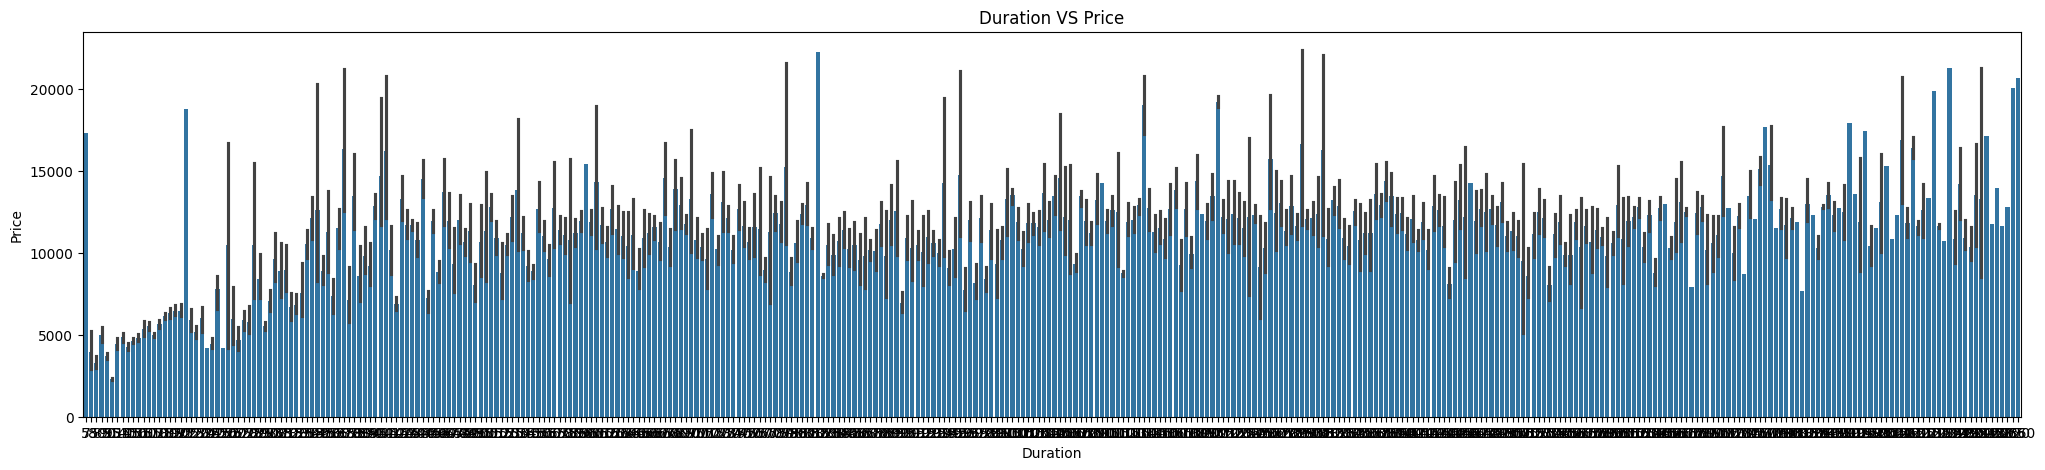

In [33]:
plt.figure(figsize=(25 , 5))
sns.barplot(x = "Duration" , y = "Price" , data = train_df)
plt.title("Duration VS Price")
plt.show()


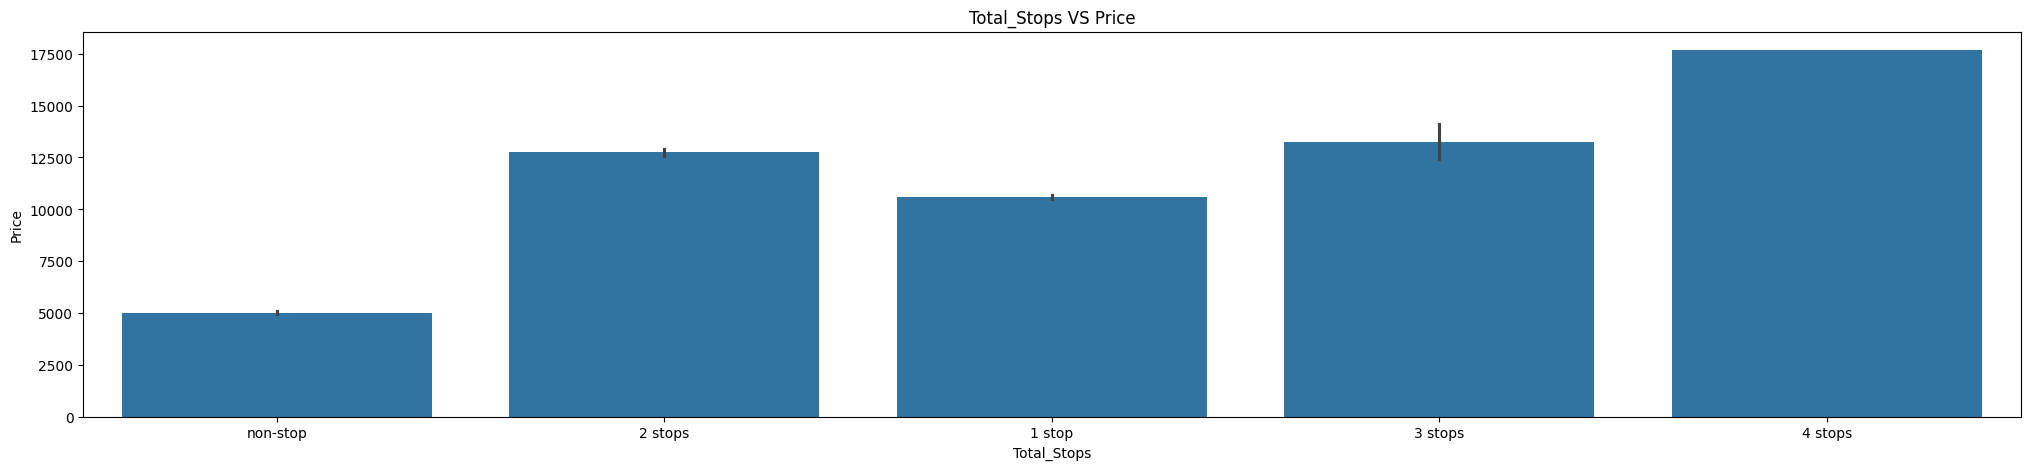

In [34]:
plt.figure(figsize=(25 , 5))
sns.barplot(x = "Total_Stops" , y = "Price" , data = train_df)
plt.title("Total_Stops VS Price")
plt.show()


We are going to change the formats of some of the columns of our data set.

Changing the format of the "Duration" to minutes only .

In [35]:
train_df['Duration'] = train_df['Duration'].astype(str).str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].astype(str).str.replace("h" , '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

Changing the format of "Date_of_Journey" into day and month.

In [36]:
train_df["Journey_Day"] = train_df['Date_of_Journey'].str.split('/').str[0]
train_df["Journey_Month"] = train_df['Date_of_Journey'].str.split('/').str[1]
train_df.drop(["Date_of_Journey"] , axis = 1 , inplace = True)

Changing the format of "Dep_Time" into min and hour.

In [37]:
train_df["Dep_Hour"] = train_df['Dep_Time'].str.split(':').str[0]
train_df["Dep_Min"] = train_df['Dep_Time'].str.split(':').str[1]
train_df.drop(["Dep_Time"] , axis = 1 , inplace = True)

Changing the format of "Arrival_Time" into min and hour.

In [38]:
train_df["Arrival_Hour"] = train_df['Arrival_Time'].str.split(':').str[0]
train_df["Arrival_Min"] = train_df['Arrival_Time'].str.split(':').str[1]
train_df.drop(["Arrival_Time"] , axis = 1 , inplace = True)

In [39]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,03,22,20,01,10 22 Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,06,09,25,04,25 10 Jun
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,01,03,16,50,21,35


In [40]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

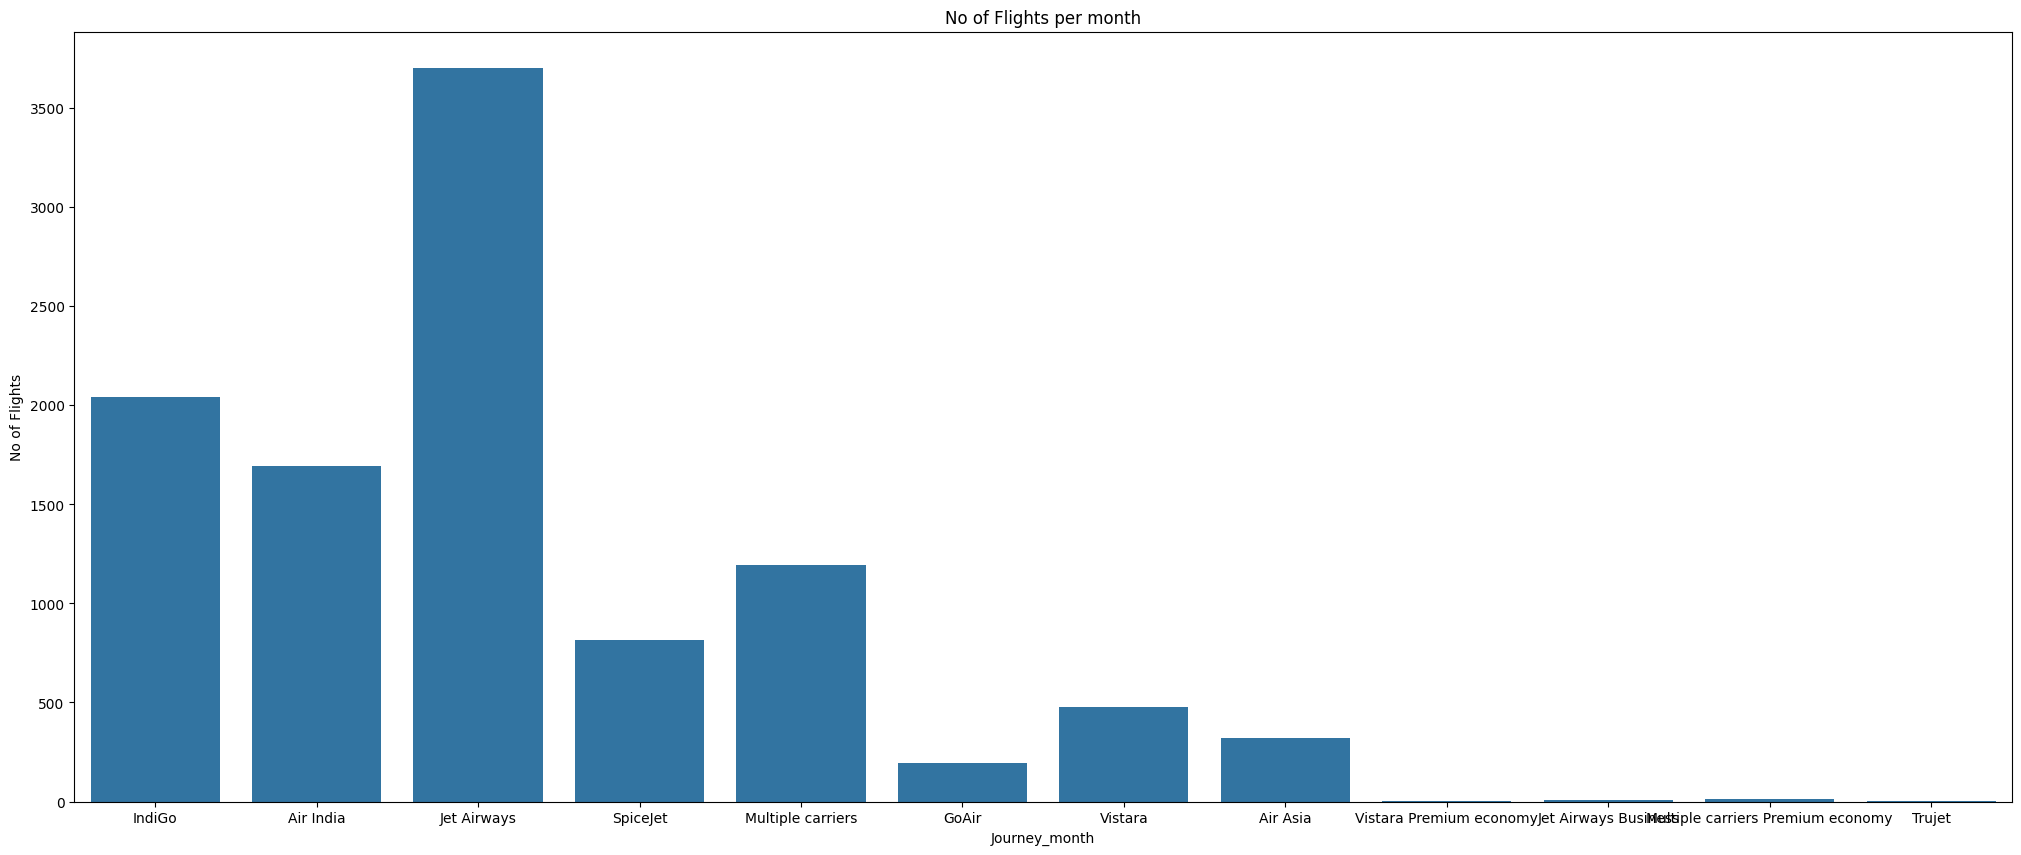

In [41]:
plt.figure(figsize=(25 , 10))

sns.countplot(x = "Airline" , data = train_df)
plt.xlabel("Journey_month")
plt.ylabel("No of Flights")
plt.title("No of Flights per month")
plt.show()

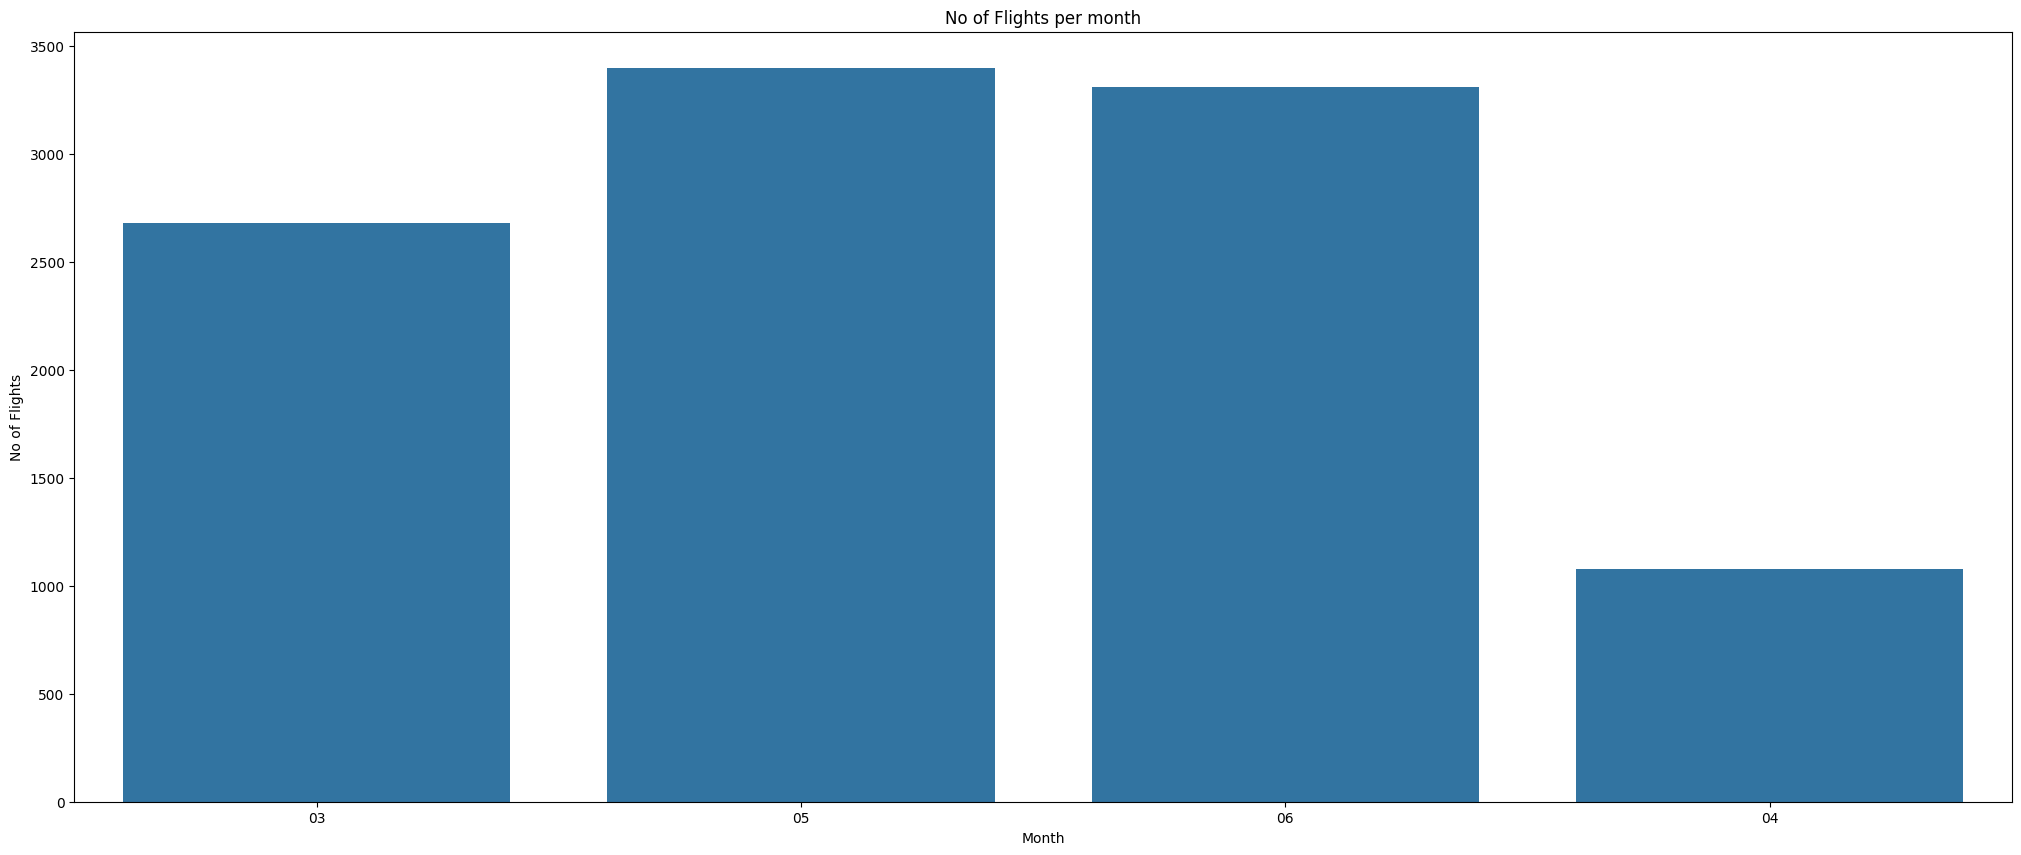

In [43]:
plt.figure(figsize=(25 , 10))
sns.countplot(x = "Journey_Month" , data = train_df)
plt.xlabel("Month")
plt.ylabel("No of Flights")
plt.title("No of Flights per month")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

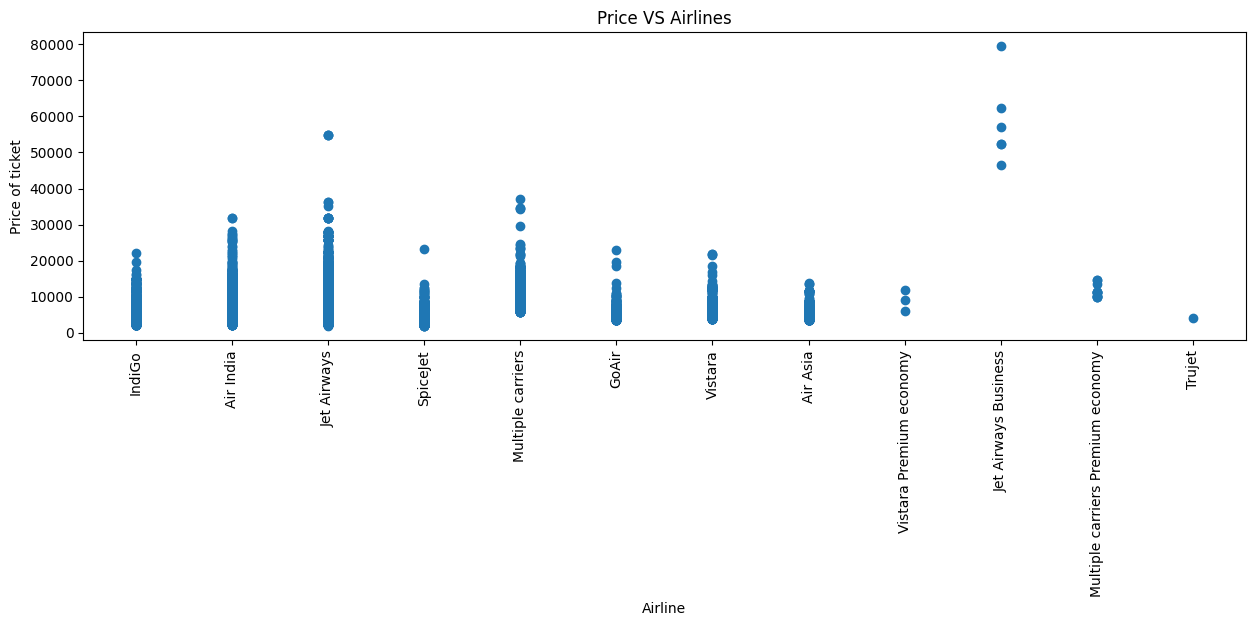

In [5]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [48]:
#calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
data = train_df.drop(["Price"] , axis = 1)

In [51]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,24,03,22,20,01,10 22 Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,06,09,25,04,25 10 Jun
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,01,03,16,50,21,35


In [52]:
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,4,8,9,0,22,4,1,101
1,1,3,0,84,1,8,4,2,5,10,13,109
2,4,2,1,118,1,8,13,3,9,5,4,206
3,3,3,0,91,0,8,5,2,18,1,23,237
4,3,0,5,29,0,8,0,0,16,10,21,265


In [53]:
X = pd.concat([train_categorical_data , train_numerical_data] , axis = 1)
Y = train_df["Price"]
test_set = pd.concat([test_categorical_data , test_numerical_data] , axis = 1)

In [54]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration
0,3,0,5,18,4,8,9,0,22,4,1,101,170
1,1,3,0,84,1,8,4,2,5,10,13,109,445
2,4,2,1,118,1,8,13,3,9,5,4,206,1140
3,3,3,0,91,0,8,5,2,18,1,23,237,325
4,3,0,5,29,0,8,0,0,16,10,21,265,285


In [55]:
Y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [58]:
def mean_absolute_percentage_error(y_true , y_pred):
  y_true , y_pred = np.array(y_true) , np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [60]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 42)

In [61]:
print("The size of training input is", X_train.shape)
print("The size of training output is", Y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", Y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
The size of testing input is (3139, 13)
The size of testing output is (3139,)


Now , we will do the model building.

Lasso Regression

In [63]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [68]:
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [67]:
print("Train Results for Lasso Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(Y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(Y_train.values, y_train_pred))

Train Results for Lasso Regression Model:
Root Mean Squared Error:  3608.4604281022503
Mean Absolute % Error:  32
R-Squared:  0.398569318210658


In [81]:
print("Test Results for Lasso Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(Y_test.values, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(Y_test.values, y_test_pred))

Test Results for Lasso Regression Model:
Root Mean Squared Error:  2357.9819430541493
Mean Absolute % Error:  9
R-Squared:  0.7322842392086506


Ridge Regression

In [70]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [71]:
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [75]:
print("Train Results for Ridge Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(Y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(Y_train.values, y_train_pred))

Train Results for Ridge Regression Model:
Root Mean Squared Error:  3606.2237139402696
Mean Absolute % Error:  32
R-Squared:  0.3993146840686992


In [76]:
print("Test Results for Ridge Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(Y_test.values, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(Y_test.values, y_test_pred))

Test Results for Ridge Regression Model:
Root Mean Squared Error:  3504.705555434829
Mean Absolute % Error:  32
R-Squared:  0.4085799231640366


Decision Tree Model

In [78]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [79]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [80]:
print("Train Results for Decision Tree Model:")
print("Root Mean squared Error: ", sqrt(mse(Y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(Y_train.values, y_train_pred))

Train Results for Decision Tree Model:
Root Mean squared Error:  402.21333538123537
Mean Absolute % Error:  2
R-Squared:  0.9925276945453705


In [84]:
print("Test Results for Decision Tree Model:")
print("Root Mean squared Error: ", sqrt(mse(Y_test.values, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(Y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(Y_test.values, y_test_pred))

Test Results for Decision Tree Model:
Root Mean squared Error:  2357.9819430541493
Mean Absolute % Error:  9
R-Squared:  0.7322842392086506


Comparison between all the Models Used

In [86]:
lasso_score = round(lasso_regressor.score(X_train, Y_train) * 100, 2)
lasso_score_test = round(lasso_regressor.score(X_test, Y_test) * 100, 2)

ridge_score = round(ridge_regressor.score(X_train, Y_train) * 100, 2)
ridge_score_test = round(ridge_regressor.score(X_test, Y_test) * 100, 2)

decision_score = round(tree.score(X_train, Y_train) * 100, 2)
decision_score_test = round(tree.score(X_test, Y_test) * 100, 2)

In [87]:
print(f"Lasso Regression - Training Score: {lasso_score}%")
print(f"Lasso Regression - Test Score: {lasso_score_test}%\n")


print(f"Ridge Regression - Training Score: {ridge_score}%")
print(f"Ridge Regression - Test Score: {ridge_score_test}%\n")


print(f"Decision Tree - Training Score: {decision_score}%")
print(f"Decision Tree - Test Score: {decision_score_test}%")


Lasso Regression - Training Score: -254305.1%
Lasso Regression - Test Score: -249985.23%

Ridge Regression - Training Score: -254884.38%
Ridge Regression - Test Score: -250633.54%

Decision Tree - Training Score: 99.25%
Decision Tree - Test Score: 73.23%
